<a href="https://colab.research.google.com/github/ritesh1601/TensorFlow/blob/main/01_neural_network_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in Tensorflow

Therea are many definitions for a regression problem but in our case , : predicting numerical variable based on some other combination of variables , even shorter ... predicting numbers.

In [17]:
import tensorflow as tf
print(tf.__version__)

2.19.0


###Creating data to view and Fit

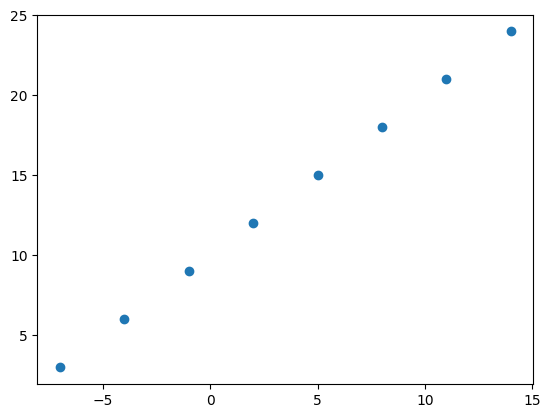

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


In [19]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [20]:
y==X+10 #relationship between input variables and output variables

array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input and Output Shapes

In [21]:
#Create a demo tesnor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [22]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [23]:
X.ndim

1

In [24]:
X[0].ndim ,y[0].ndim

(0, 0)

In [25]:
#Turn our Numpy array into Tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

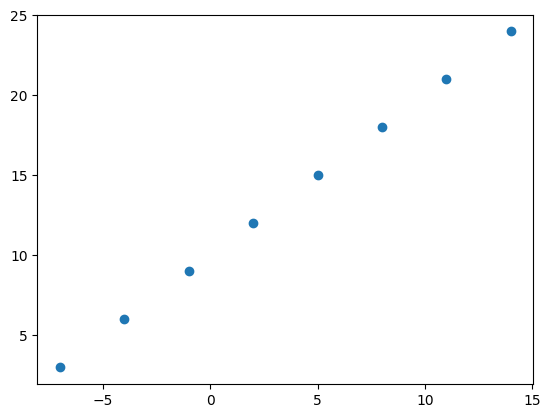

In [27]:
plt.scatter(X,y)

##Steps in modelling with TensorFlow


1.   Creating a model - define the input and output layers ,  as well as the hidden layers of a deep learning model
2.   Compiling a model - define the loss function(in other words ,  the function which tells out model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluating metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find the patterns between X&y(features and labels)


![image.png](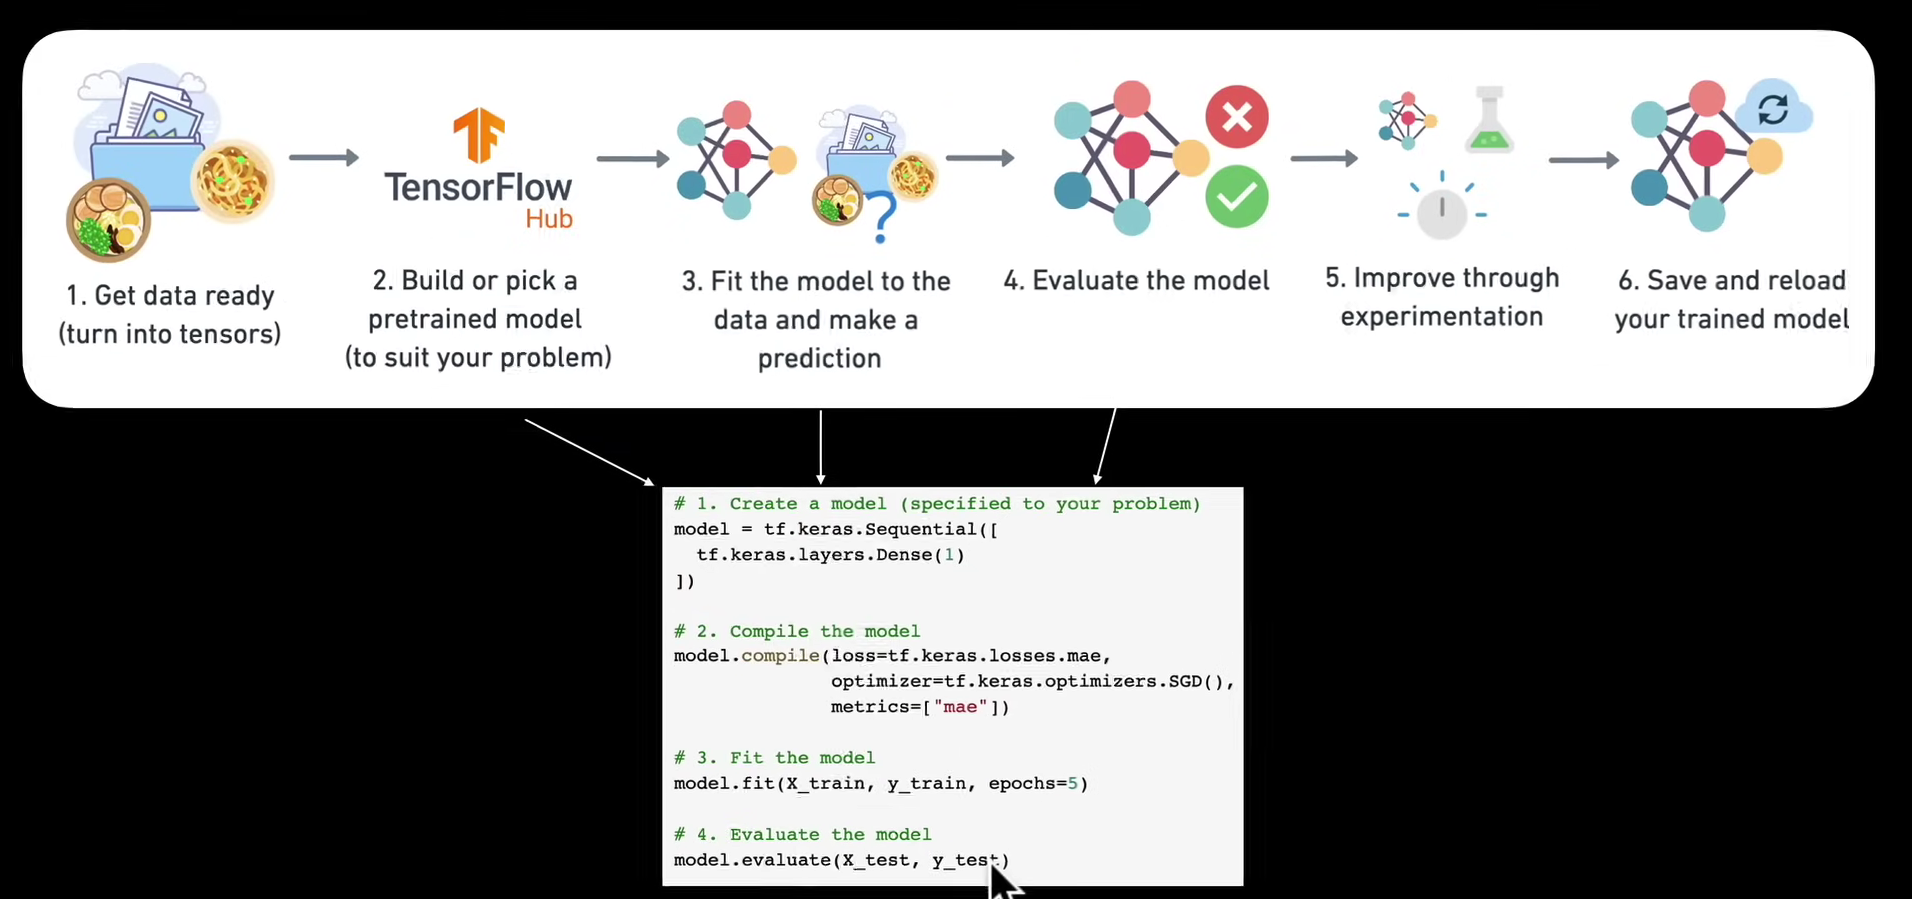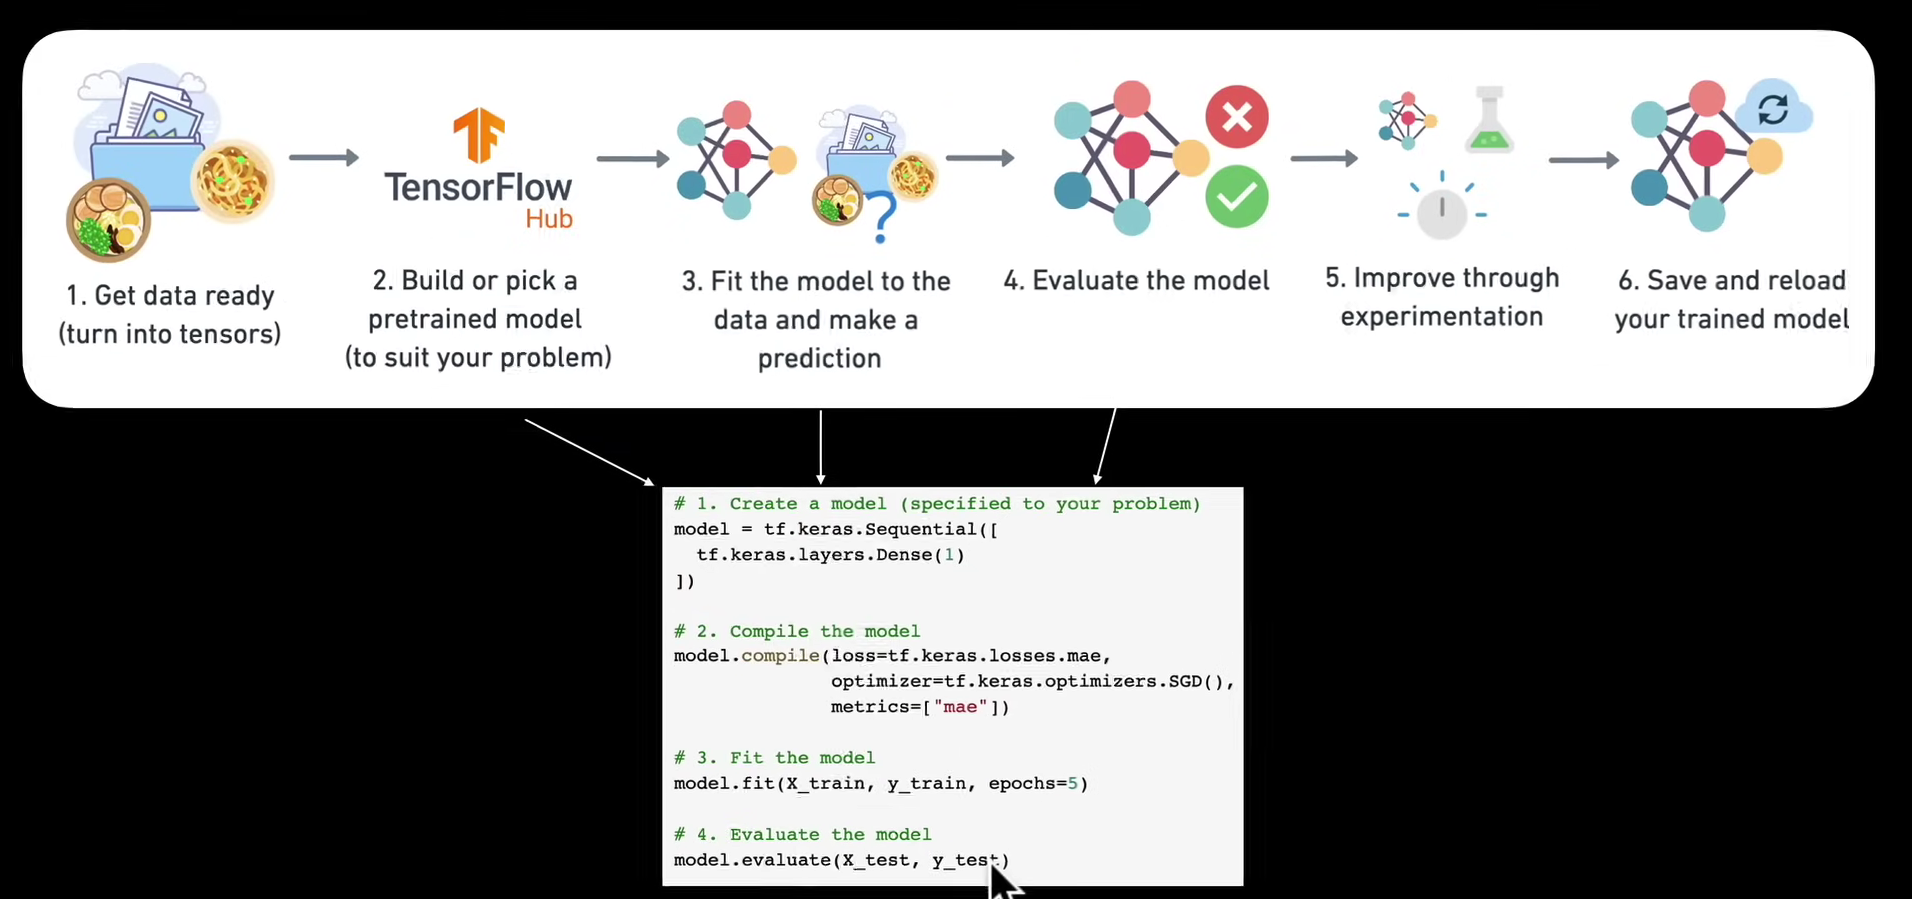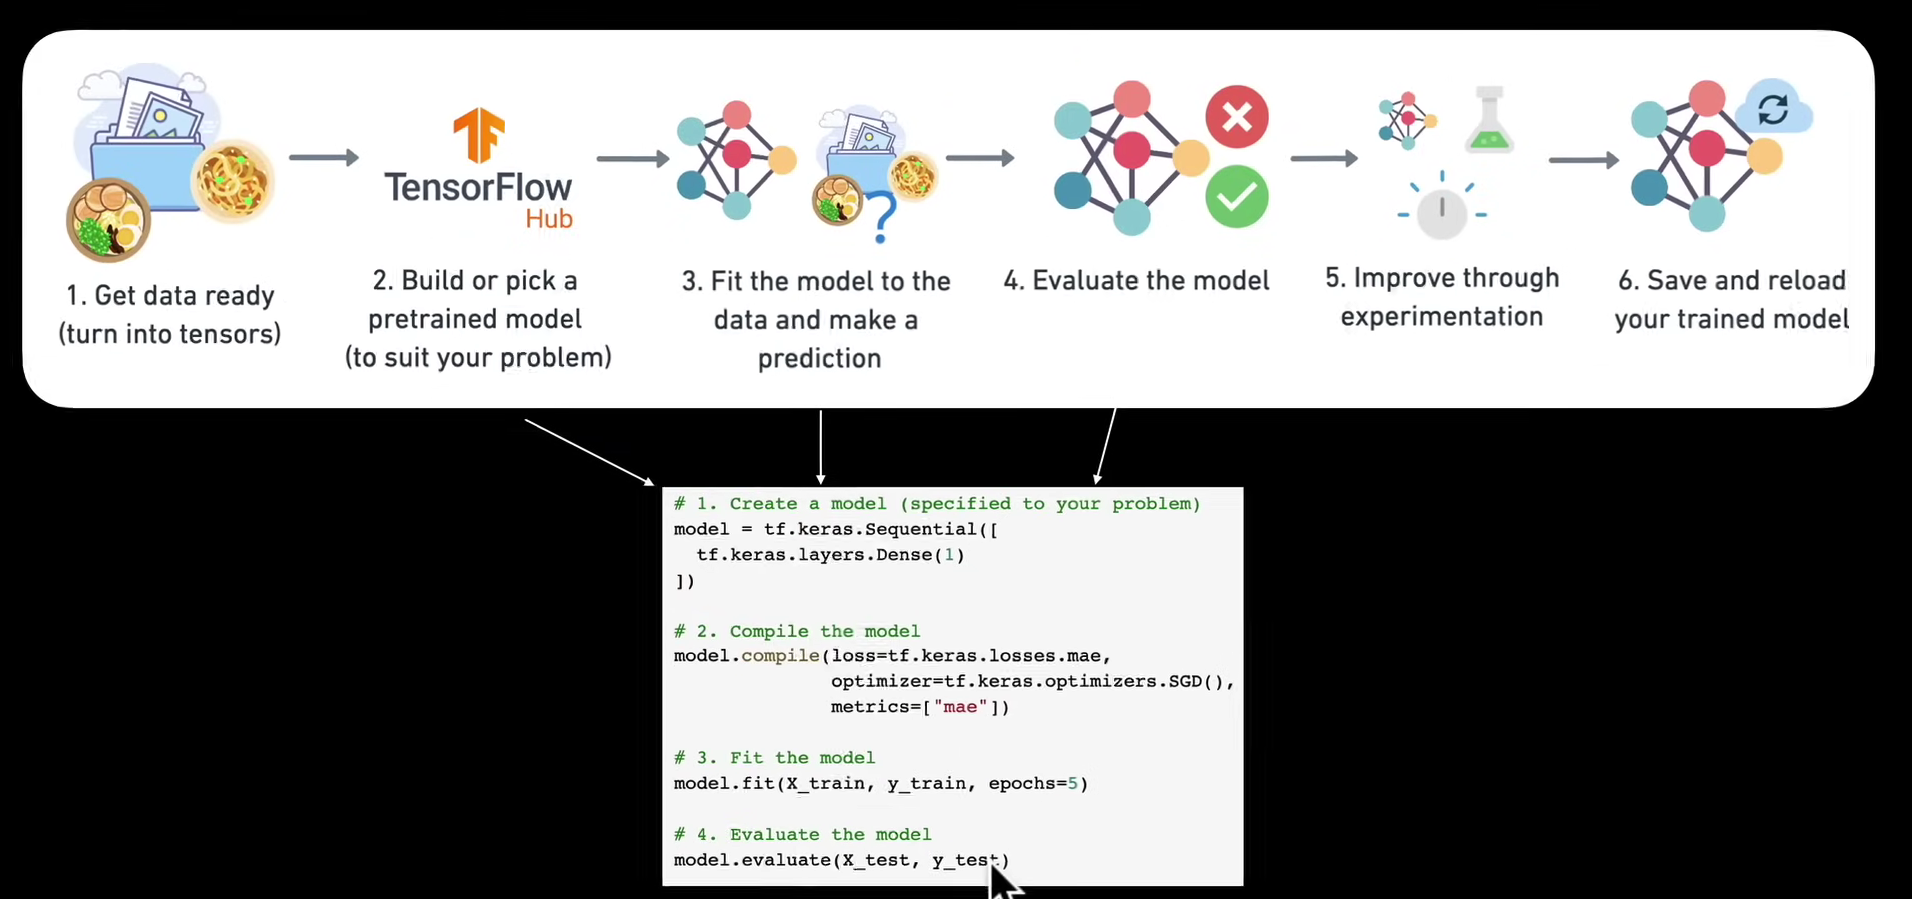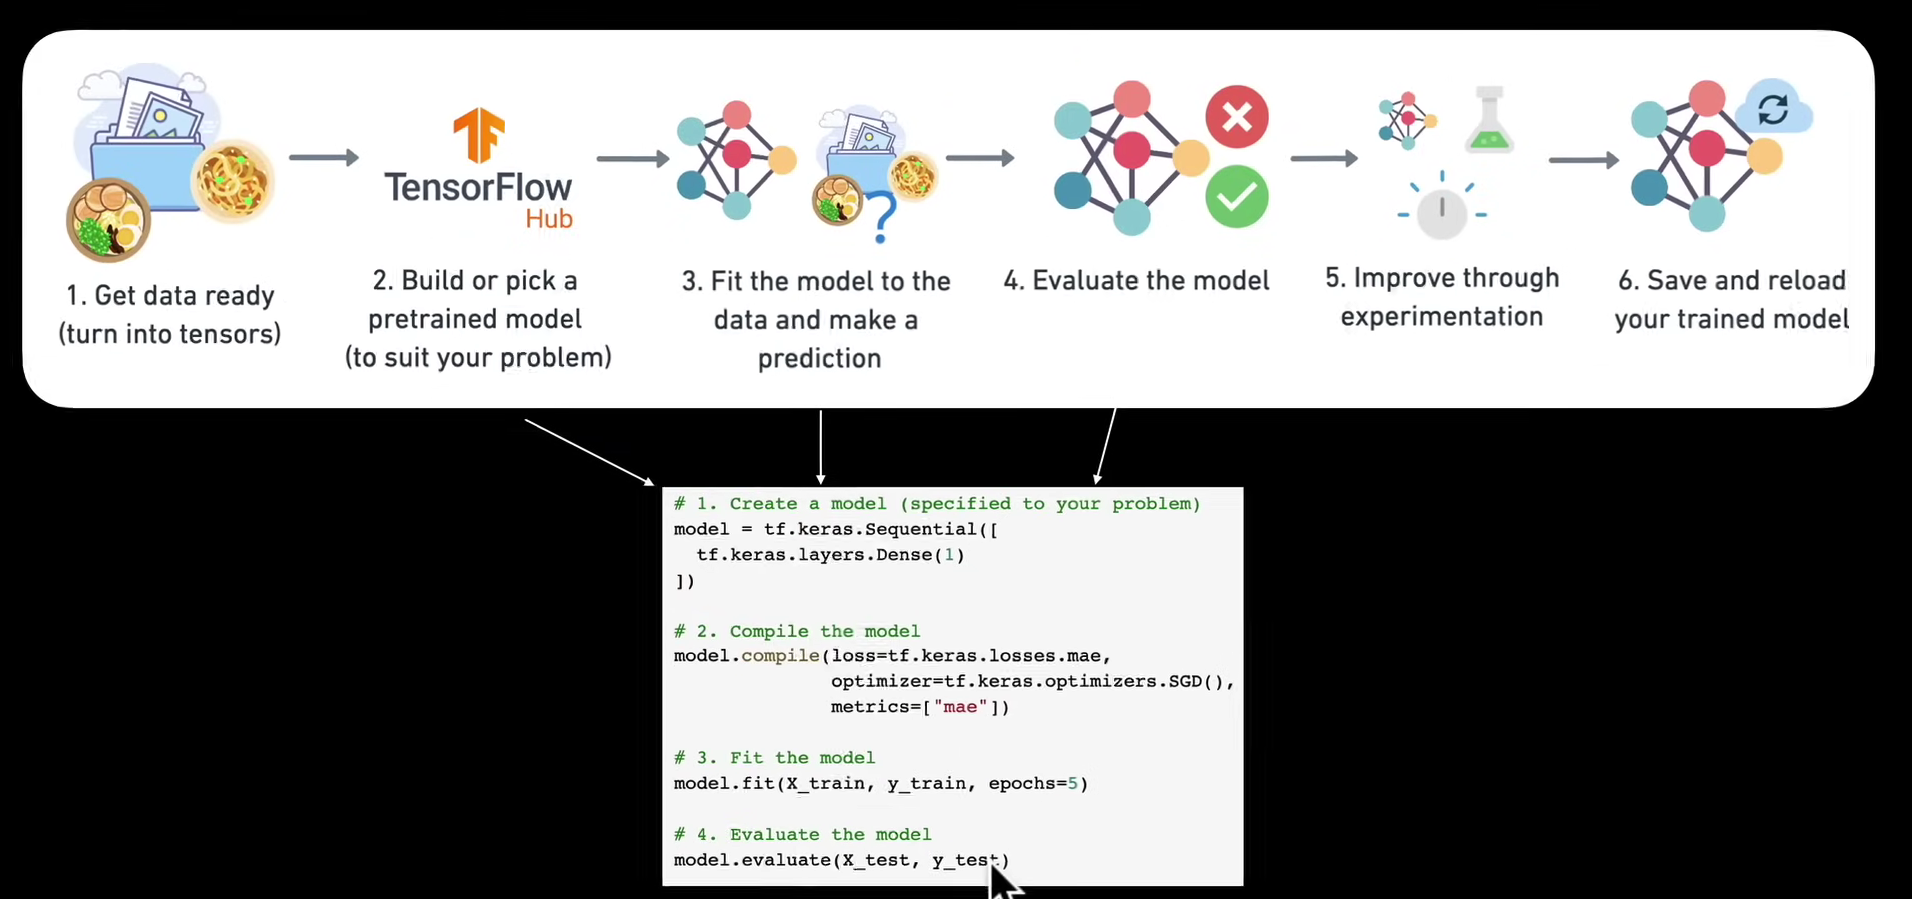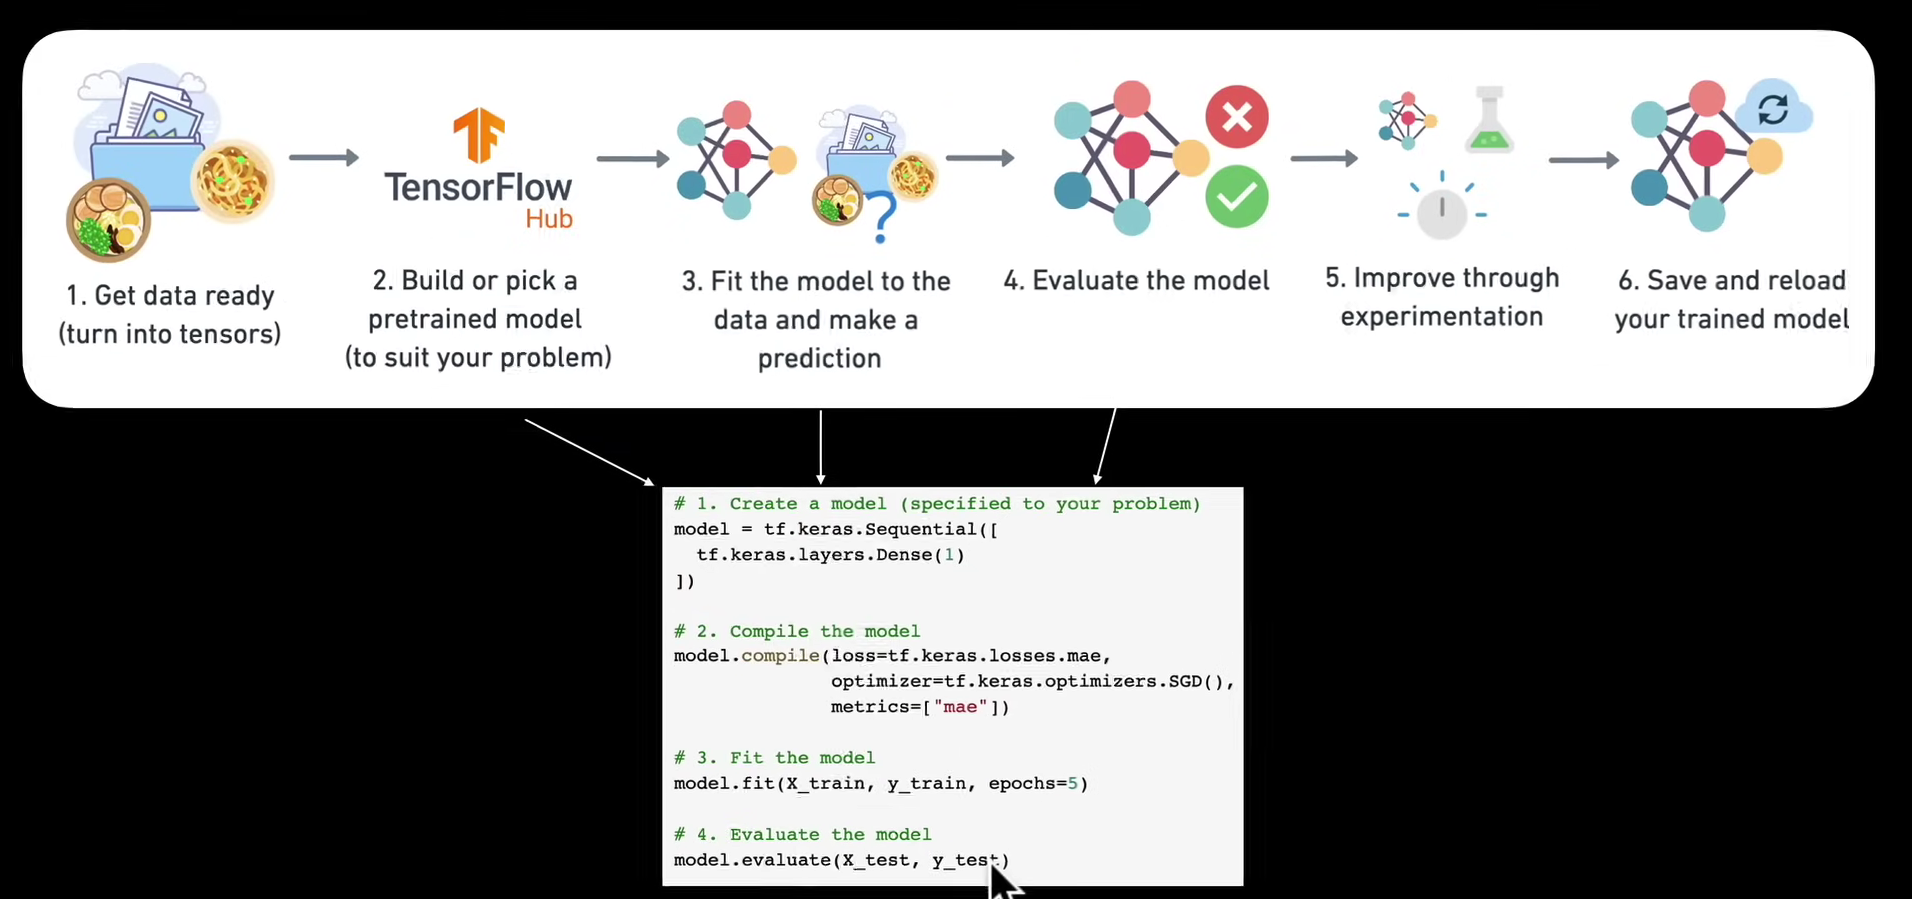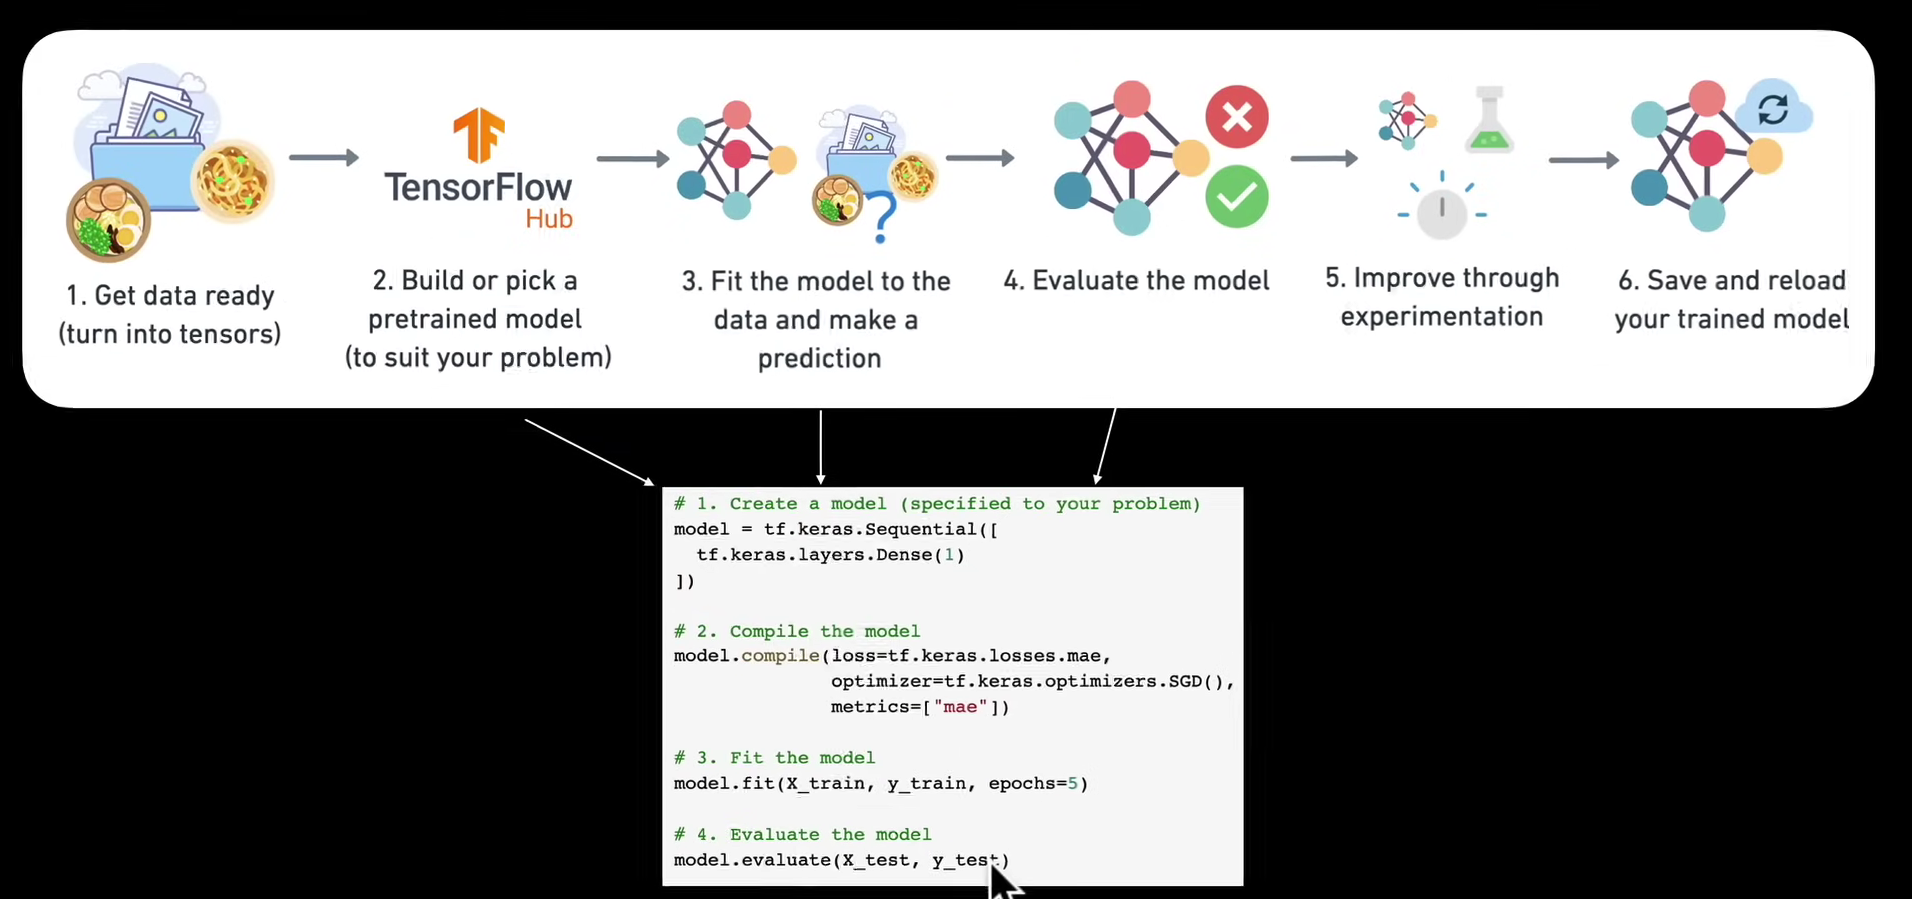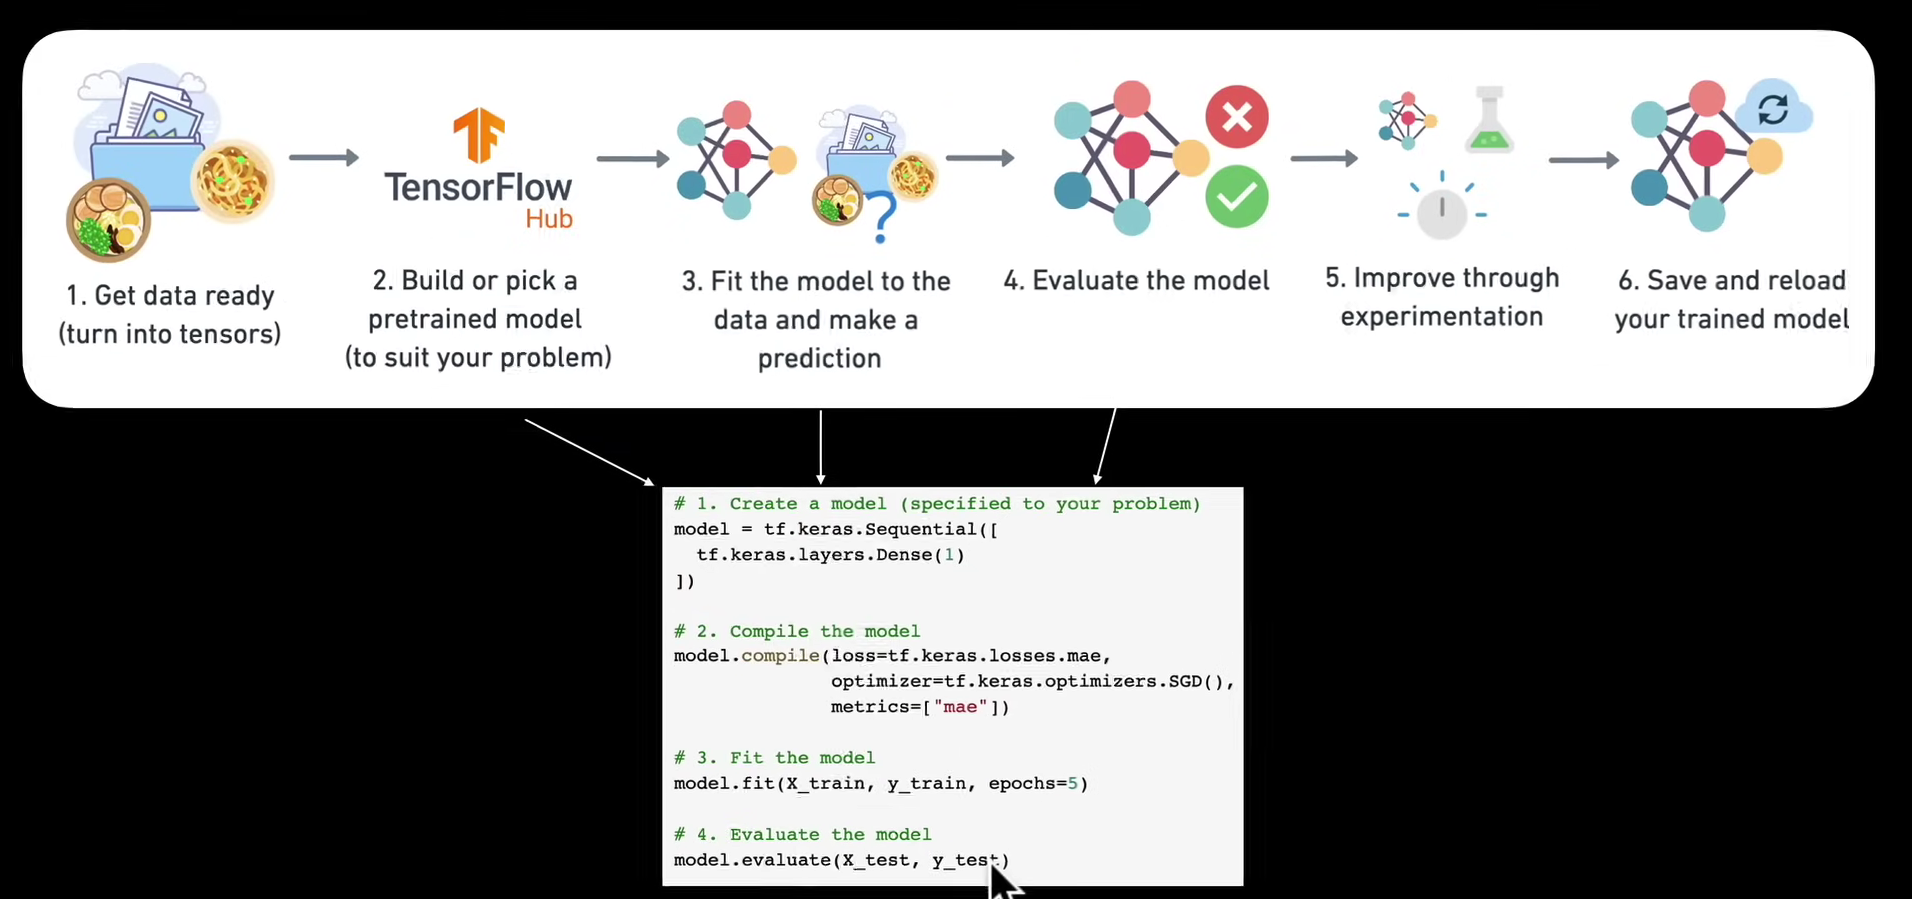)

In [28]:
tf.size(y).numpy()

np.int32(8)

In [29]:
X = tf.reshape(X, shape=(1, -1))
y = tf.reshape(y, shape=(1, -1))

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.8993 - mae: 12.8993
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 8.7220 - mae: 8.7220
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 6.7759 - mae: 6.7759
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 6.1667 - mae: 6.1667
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 6.0000 - mae: 6.0000
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 6.0000 - mae: 6.0000
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 6.0000 - mae: 6.0000
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 6.0000 - mae: 6.0000
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 6.0000 - mae: 6.0000
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.0000 - mae: 6.0000
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 6.0000 - mae: 6.0000
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 6.0000 - mae: 6.0000
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - los

In [30]:
X,y

(<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]], dtype=float32)>)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - loss: 9.8400 - mae: 9.8400
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.7075 - mae: 9.7075
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.5750 - mae: 9.5750
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.4425 - mae: 9.4425
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.3100 - mae: 9.3100
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.1775 - mae: 9.1775
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.0450 - mae: 9.0450
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.9125 - mae: 8.9125
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.7800 - mae: 8.7800
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.6475 - mae: 8.6475
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.5150 - mae: 8.5150
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.3825 - mae: 8.3825
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.2500 - mae:

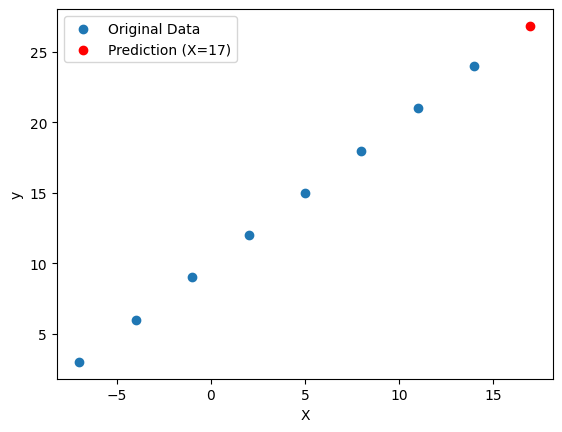

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Create features and labels
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# 2. Convert to tensors and reshape for 8 samples, 1 feature each
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X = tf.reshape(X, shape=(-1, 1))  # shape becomes (8,1)
y = tf.reshape(y, shape=(-1, 1))  # shape becomes (8,1)

# 3. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 4. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 5. Train the model
model.fit(X, y, epochs=15)

# 6. Predict for new data (example: X = 17)
new_X = tf.constant([[17.0]], dtype=tf.float32)
y_pred = model.predict(new_X)

print("\nPredicted output for X = 17:", y_pred[0][0])

# 7. (Optional) Visualize the data and prediction
plt.scatter(X, y, label="Original Data")
plt.scatter(17, y_pred, color="red", label="Prediction (X=17)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


##Improving our model
We improve our mode by making changes in the steps we took to create the model
1.   **Creating a model** - here we might add more layers , increase the number of hidden neurons within each of the hidden layers , change the activation function of each layer.
2. **Compiling a model**-here we might change the optimization function or perhaps the **learning rate** of the optimization function   
3. **Fitting a model**-here we might increase the number of epochs

In [32]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13.5572 - mae: 13.5572
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 13.2869 - mae: 13.2869
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.0613 - mae: 13.0613
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.8300 - mae: 12.8300
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 12.6045 - mae: 12.6045
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.3742 - mae: 12.3742
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.1032 - mae: 12.1032
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.7841 - mae: 11.7841
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.4160 - mae: 11.4160
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.9931 - mae: 10.9931
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.5995 - mae: 10.5995
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.1908 - mae: 10.1908
Epoch 13/100
1/1 ━━━━━━━━━━

In [33]:
model.predict(new_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[31.545639]], dtype=float32)

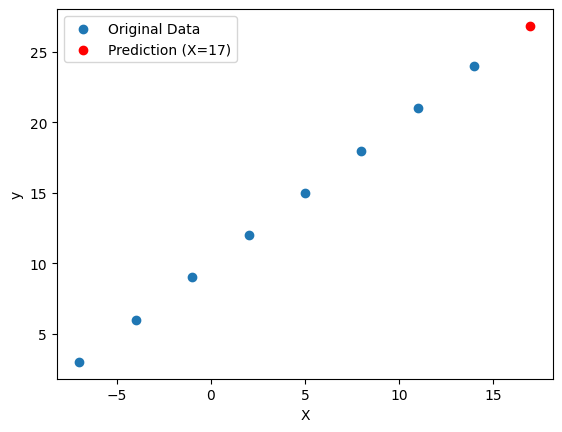

In [34]:
# 7. (Optional) Visualize the data and prediction
plt.scatter(X, y, label="Original Data")
plt.scatter(17, y_pred, color="red", label="Prediction (X=17)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

##Evaluating a model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model->fit it->evaluate it->tweak a model->fit it->evaluate it->tweak a model->fit it->evaluate it ....
```

When it comes to evaluating
"Visualize","Visualize","Visualize"

its a good idea to visualize:


*   The Data - what data are we working with ?What does it look like?
*   The model itself - what does our model look like?
*   The training of model - how does a model perform while it learns?
*   The predictions of the model - how do the predictions of a model line up against the ground truth



In [35]:
#make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [36]:
Y=X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

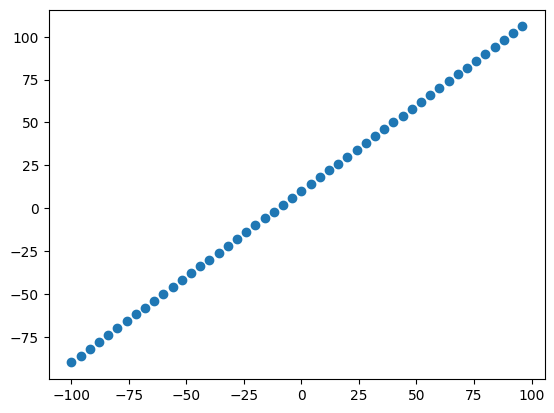

In [37]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### The 3 sets...
* **Training Set-** the model learns from this data , which is typically 70-80% of the total data you have available.
* **Validation Set-** the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set-** the model gets evaluated on this data to test what is has learned , this set is typically 10-15% of the total data available

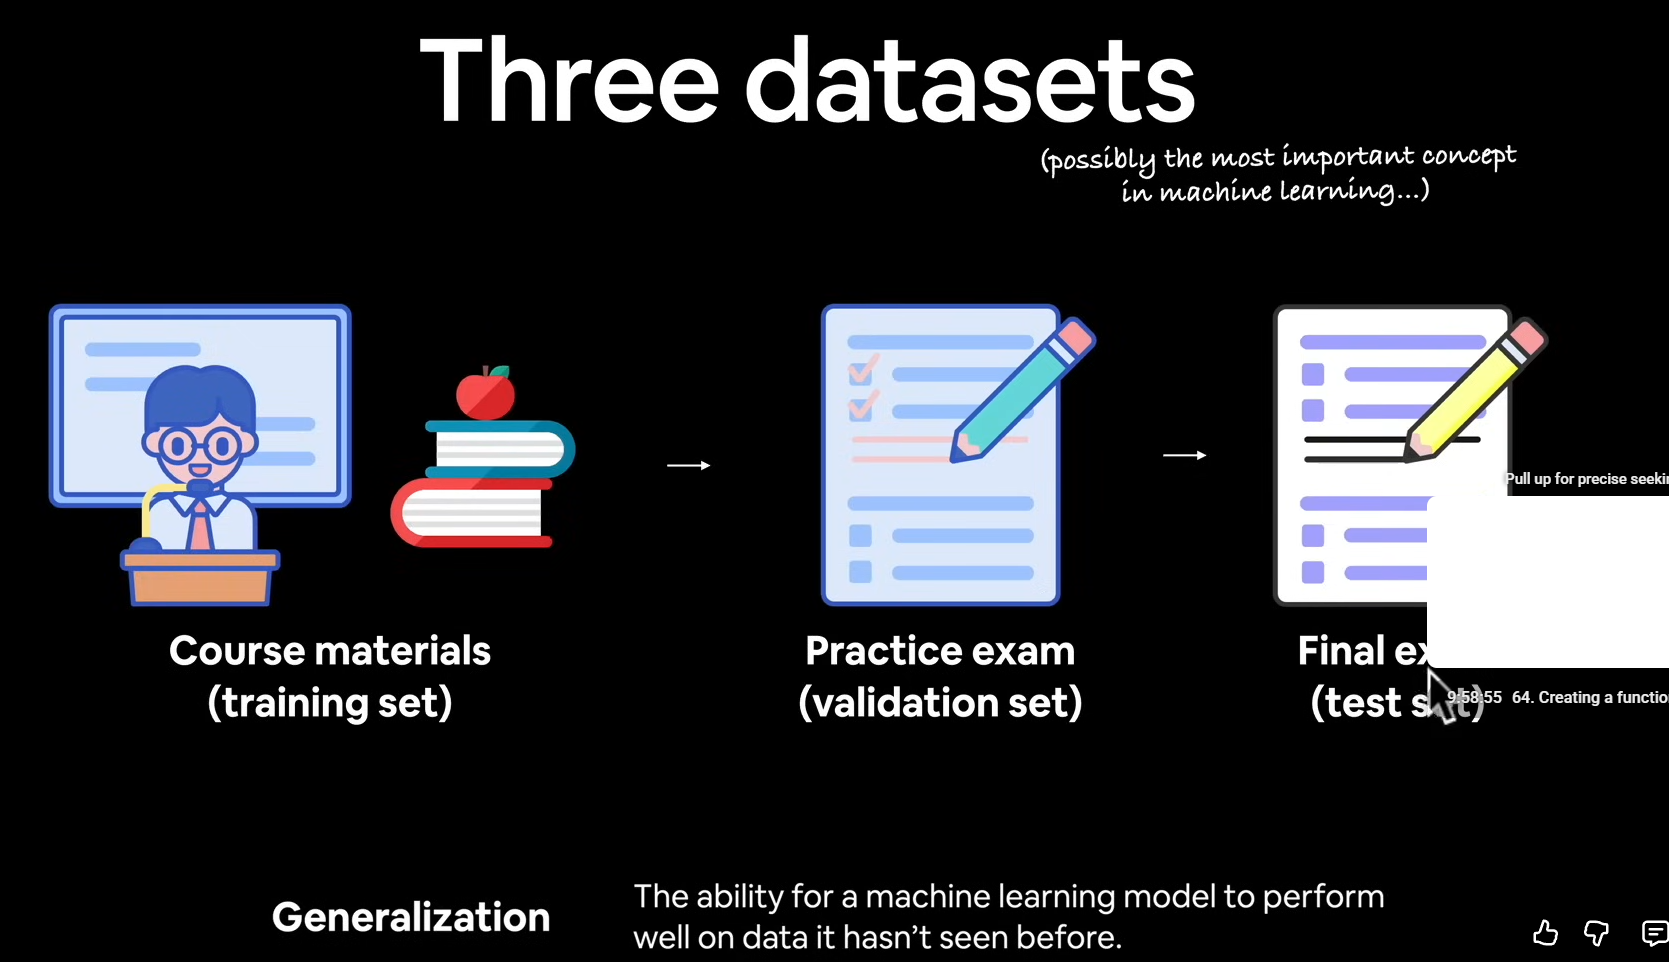

In [48]:
# Check the lenght of the data we have
len(X),len(Y)

(50, 50)

In [49]:
# Split the data into Training and Test sets
X_train=X[:40]
Y_train=Y[:40]
X_test=X[40:]
Y_test=Y[40:]

len(X_train) , len(X_test) , len(Y_train) , len(Y_test)

(40, 10, 40, 10)

###Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

In [50]:
len(X_train),len(Y_train)

(40, 40)

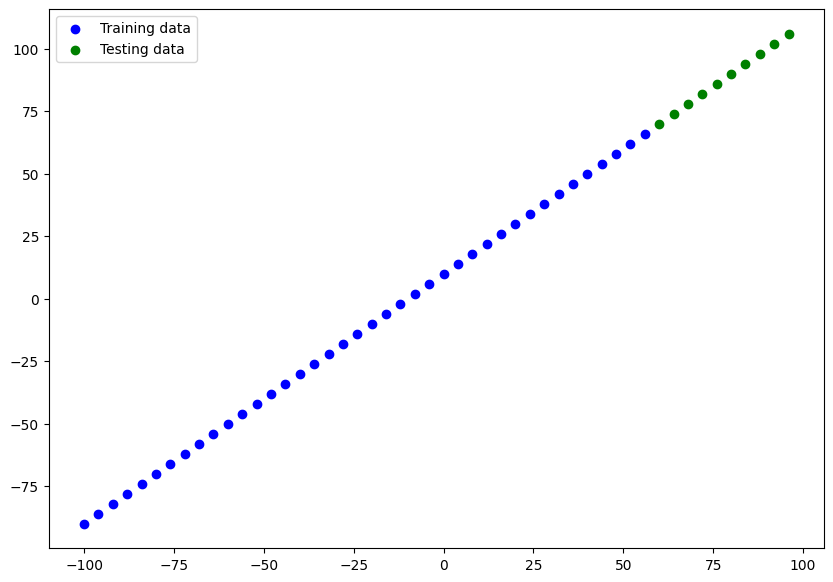

In [51]:

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();